In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd
import os
from sklearn.utils import check_random_state

In [2]:
# Generating artificial data.
n = 50
XX = np.arange(n)
rs = check_random_state(0)
YY = rs.randint(-10, 10, size=(n,)) + 2.0 * XX
data = np.stack([XX,YY], axis=1)

In [3]:
#######################
## Defining flags #####
#######################

num_epochs = 50

In [4]:
# creating the weight and bias.
# The defined variables will be initialized to zero.
W = tf.Variable(0.0, name="weights")
b = tf.Variable(0.0, name="bias")

In [5]:
###############################
##### Necessary functions #####
###############################

#  Creating placeholders for input X and label Y.
def inputs():
    """
    Defining the place_holders.
    :return:
            Returning the data and label place holders.
    """
    X = tf.placeholder(tf.float32, name="X")
    Y = tf.placeholder(tf.float32, name="Y")
    return X,Y

# Create the prediction.
def inference(X):
    """
    Forward passing the X.
    :param X: Input.
    :return: X*W + b.
    """
    return X * W + b

def loss(X, Y):
    '''
    compute the loss by comparing the predicted value to the actual label.
    :param X: The input.
    :param Y: The label.
    :return: The loss over the samples.
    '''

    # Making the prediction.
    Y_predicted = inference(X)
    return tf.reduce_sum(tf.squared_difference(Y, Y_predicted))/(2*data.shape[0])


# The training function.
def train(loss):
    learning_rate = 0.0001
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [6]:
with tf.Session() as sess:

    # Initialize the variables[w and b].
    sess.run(tf.global_variables_initializer())

    # Get the input tensors
    X, Y = inputs()

    # Return the train loss and create the train_op.
    train_loss = loss(X, Y)
    train_op = train(train_loss)

    # Step 8: train the model
    for epoch_num in range(num_epochs):
        loss_value, _ = sess.run([train_loss,train_op],
                                 feed_dict={X: data[:,0], Y: data[:,1]})

        # Displaying the loss per epoch.
        print('epoch %d, loss=%f' %(epoch_num+1, loss_value))

        # save the values of weight and bias
        wcoeff, bias = sess.run([W, b])

epoch 1, loss=1573.599976
epoch 2, loss=1332.513916
epoch 3, loss=1128.868408
epoch 4, loss=956.848999
epoch 5, loss=811.544067
epoch 6, loss=688.804993
epoch 7, loss=585.127441
epoch 8, loss=497.550781
epoch 9, loss=423.574799
epoch 10, loss=361.087372
epoch 11, loss=308.304138
epoch 12, loss=263.718170
epoch 13, loss=226.056366
epoch 14, loss=194.243423
epoch 15, loss=167.371048
epoch 16, loss=144.671936
epoch 17, loss=125.497986
epoch 18, loss=109.301781
epoch 19, loss=95.620842
epoch 20, loss=84.064514
epoch 21, loss=74.302887
epoch 22, loss=66.057228
epoch 23, loss=59.092148
epoch 24, loss=53.208710
epoch 25, loss=48.238998
epoch 26, loss=44.041073
epoch 27, loss=40.495071
epoch 28, loss=37.499771
epoch 29, loss=34.969639
epoch 30, loss=32.832432
epoch 31, loss=31.027143
epoch 32, loss=29.502199
epoch 33, loss=28.214087
epoch 34, loss=27.126015
epoch 35, loss=26.206921
epoch 36, loss=25.430567
epoch 37, loss=24.774773
epoch 38, loss=24.220827
epoch 39, loss=23.752905
epoch 40, los

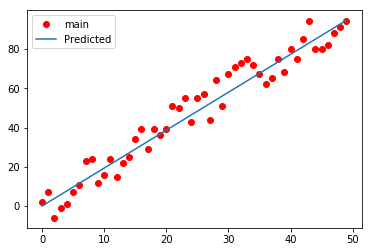

In [7]:
###############################
#### Evaluate and plot ########
###############################
Input_values = data[:,0]
Labels = data[:,1]
Prediction_values = data[:,0] * wcoeff + bias

# uncomment if plotting is desired!
plt.plot(Input_values, Labels, 'ro', label='main')
plt.plot(Input_values, Prediction_values, label='Predicted')

# Saving the result.
plt.legend()
plt.show()
plt.close()